<a href="https://colab.research.google.com/github/dhanish777/ML-Projects/blob/main/OnlinePaymentsFraud_Project4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FRAUD DETECTION IN VARIOUS TYPES OF FINANCIAL TRANSACTIONS

### One of the biggest problems facing financial institutions worldwide is the detection of fraud in financial transactions. To minimise financial losses and maintain security, it is critical to be able to precisely detect fraudulent activity in the midst of massive volumes of transaction data. This project analyses transaction data and forecasts fraudulent activity using sophisticated machine learning models, such as Random Forest, Logistic Regression, and Naive Bayes. The models are scaled, encoded, and trained using robust feature engineering techniques to assess the models' performance. The results show how effective these models are, with the Random Forest classifier standing out for its exceptional performance in reliably and precisely identifying fraud. This thorough analysis highlights how machine learning can improve fraud detection systems and offer insightful information for financial security applications.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv(r"C:\Users\dhani\Downloads\onlinefraud.csv\onlinefraud.csv")

In [ ]:
df.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.shape


(6362620, 11)

In [ ]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

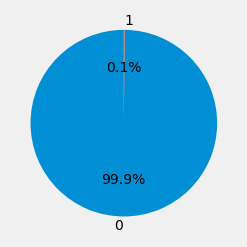

In [ ]:
fraud = df['isFraud'].value_counts()
fraud_idx = fraud.index
fraud_val = fraud.values

plt.pie(fraud_val,
        labels=fraud_idx,
        autopct='%1.1f%%',
        startangle=90)
plt.show()

### Downsampling Data

In [ ]:
df_non_fraud = df[df['isFraud'] == 0].sample(n=100000, random_state=42)
df_fraud = df[df['isFraud'] == 1]

df2= pd.concat([df_non_fraud, df_fraud])
df2= df2.sample(frac=1, random_state=42)
df2.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5714024,398,PAYMENT,28860.39,C1083658007,32174.00,3313.61,M1073475324,0.00,0.00,0,0
2551092,206,CASH_IN,109088.87,C711316604,12984.00,122072.87,C83581109,0.00,0.00,0,0
203592,13,TRANSFER,691054.46,C1512288815,45096.39,0.00,C69589225,1698444.13,2389498.59,0,0
3558597,260,PAYMENT,4789.25,C969093853,29979.00,25189.75,M134972144,0.00,0.00,0,0
1952779,178,PAYMENT,4031.31,C762908779,0.00,0.00,M1316905264,0.00,0.00,0,0
3654829,275,TRANSFER,451080.36,C521917611,44644.00,0.00,C1677446045,0.00,451080.36,0,0
4781672,335,CASH_OUT,41298.96,C1742759492,37838.78,0.00,C884689026,81368.70,122667.66,0,0
3128658,236,PAYMENT,18011.22,C2004976256,0.00,0.00,M583295358,0.00,0.00,0,0
6320915,687,PAYMENT,2074.09,C2006935594,0.00,0.00,M1368457784,0.00,0.00,0,0
1936494,177,PAYMENT,8438.66,C1286043874,19234.00,10795.34,M679483618,0.00,0.00,0,0


In [ ]:
fraud2 = df2['isFraud'].value_counts()
fraud2_idx = fraud2.index
fraud2_val = fraud2.values

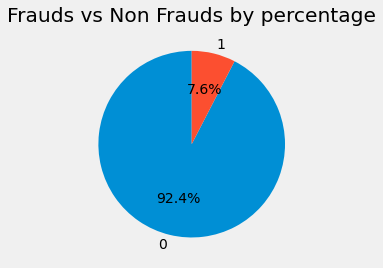

In [ ]:
plt.pie(fraud2_val,
        labels=fraud2_idx,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Frauds vs Non Frauds by percentage")
plt.show()

### Data overview

In [ ]:
df2.shape

(108213, 11)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108213 entries, 5714024 to 1343341
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            108213 non-null  int64  
 1   type            108213 non-null  object 
 2   amount          108213 non-null  float64
 3   nameOrig        108213 non-null  object 
 4   oldbalanceOrg   108213 non-null  float64
 5   newbalanceOrig  108213 non-null  float64
 6   nameDest        108213 non-null  object 
 7   oldbalanceDest  108213 non-null  float64
 8   newbalanceDest  108213 non-null  float64
 9   isFraud         108213 non-null  int64  
 10  isFlaggedFraud  108213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.9+ MB


In [ ]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,108213.000000,1.082130e+05,1.082130e+05,1.082130e+05,1.082130e+05,1.082130e+05,108213.000000,108213.000000
mean,253.148088,2.782301e+05,8.781334e+05,7.887530e+05,1.057067e+06,1.230957e+06,0.075897,0.000148
std,153.257221,9.654623e+05,2.899878e+06,2.815070e+06,3.447306e+06,3.770020e+06,0.264834,0.012159
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.470375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,251.000000,8.631680e+04,2.009400e+04,0.000000e+00,9.595315e+04,1.995590e+05,0.000000,0.000000
75%,350.000000,2.323131e+05,1.621128e+05,1.136025e+05,8.809185e+05,1.114542e+06,0.000000,0.000000
max,743.000000,6.988673e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [ ]:
df2.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df2.select_dtypes("object").describe()

,type,nameOrig,nameDest
count,108213,108213,108213
unique,5,108212,100183
top,CASH_OUT,C649046785,C1734774007
freq,39195,2,5


In [ ]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df2.drop(["isFlaggedFraud"],axis=1,inplace=True)

In [ ]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df2.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1851604,164,PAYMENT,6473.23,C840490123,0.00,0.00,M106869685,0.00,0.00,0
1122208,130,CASH_OUT,105423.92,C1245586183,30323.00,0.00,C1264545018,0.00,105423.92,0
968933,44,CASH_OUT,61852.83,C203374685,16016.00,0.00,C1639484409,0.00,61852.83,0
5919866,404,PAYMENT,25481.15,C1942056269,126138.00,100656.85,M671439249,0.00,0.00,0
3098884,235,TRANSFER,188684.82,C2137024272,0.00,0.00,C1054174966,393013.10,581697.92,0
6021019,466,DEBIT,1825.04,C1446431418,84009.00,82183.96,C1295363363,6987.65,8812.69,0
6112946,526,PAYMENT,4964.28,C1590755226,0.00,0.00,M1306201609,0.00,0.00,0
4584813,328,CASH_OUT,474467.20,C1621566840,474467.20,0.00,C1076657596,121181.01,295538.25,1
3215772,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0
1343341,137,CASH_OUT,172093.94,C1839205518,152985.00,0.00,C398870001,0.00,172093.94,0


### EDA Plots

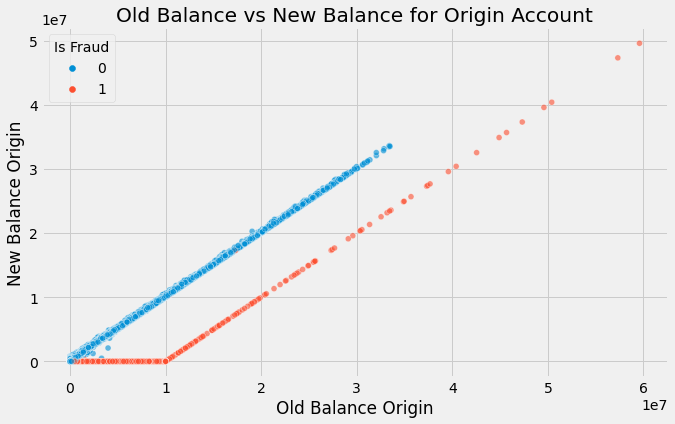

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=df2, hue='isFraud', alpha=0.6)
plt.title('Old Balance vs New Balance for Origin Account')
plt.xlabel('Old Balance Origin')
plt.ylabel('New Balance Origin')
plt.legend(title='Is Fraud')
plt.show()

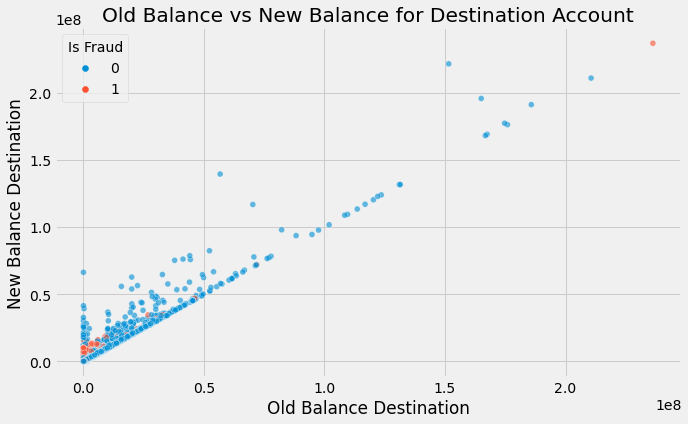

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', data=df2, hue='isFraud', alpha=0.6)
plt.title('Old Balance vs New Balance for Destination Account')
plt.xlabel('Old Balance Destination')
plt.ylabel('New Balance Destination')
plt.legend(title='Is Fraud')
plt.show()


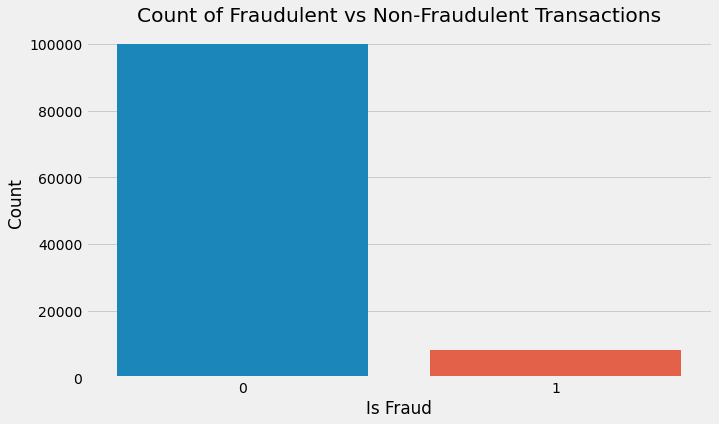

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df2)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

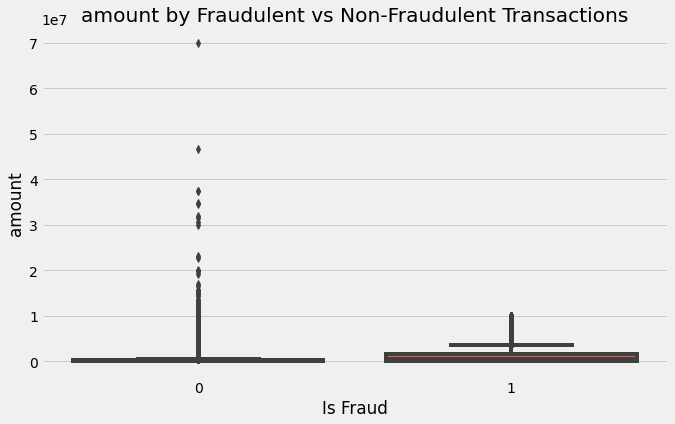

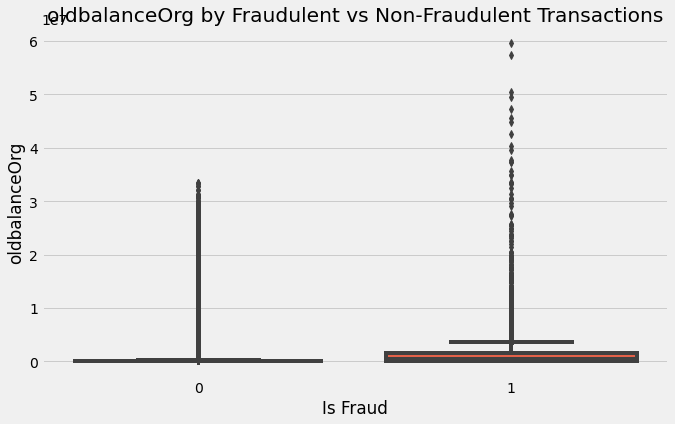

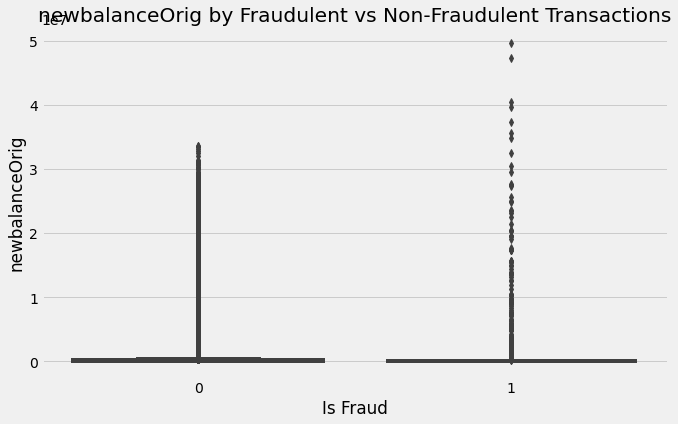

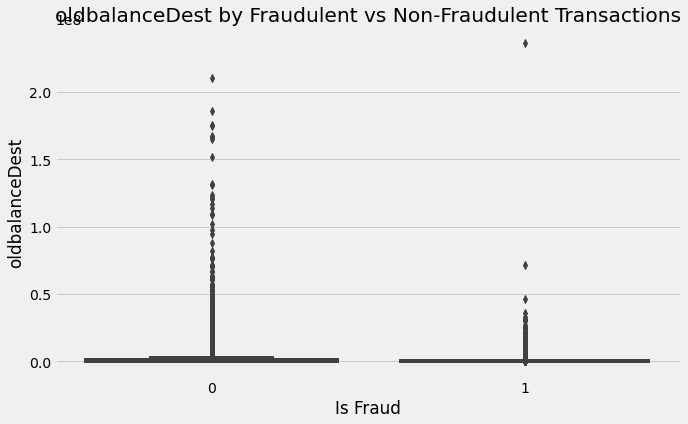

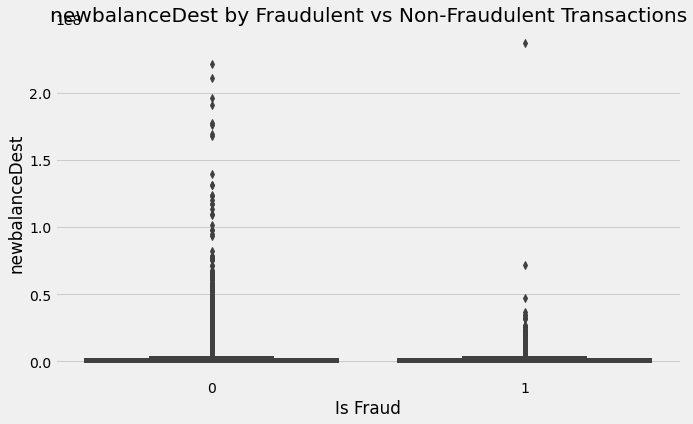

In [ ]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='isFraud', y=feature, data=df2)
    plt.title(f'{feature} by Fraudulent vs Non-Fraudulent Transactions')
    plt.xlabel('Is Fraud')
    plt.ylabel(feature)
    plt.show()

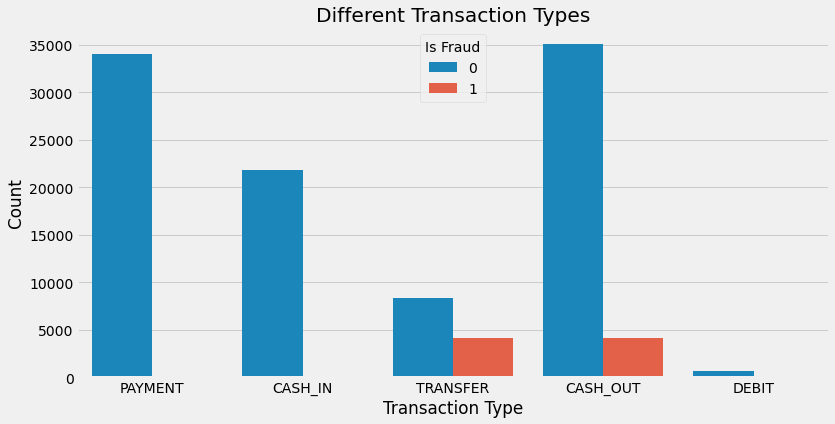

In [ ]:
# Bar chart for the count of different transaction types with fraud and non-fraud differentiation
plt.figure(figsize=(12, 6))
sns.countplot(x=df2['type'], hue=df2['isFraud'])
plt.title('Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

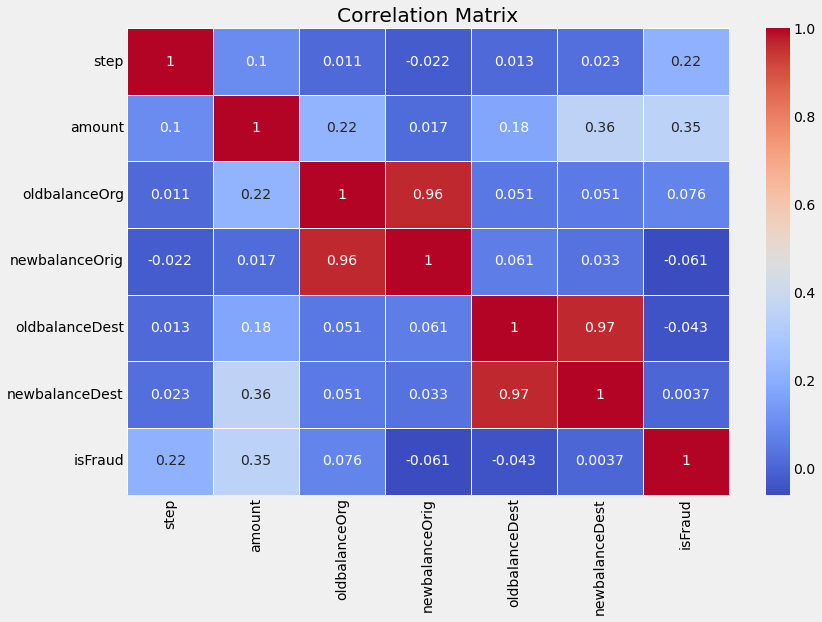

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Diffrerentiating columns
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()

print(numerical_columns)
print(categorical_columns)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
['type', 'nameOrig', 'nameDest']


### PreProcessing

In [ ]:
missing_values = df2.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [ ]:
# Step 3: Feature Engineering
df2['balanceOrgChange'] = df2['newbalanceOrig'] - df2['oldbalanceOrg']
df2['balanceDestChange'] = df2['newbalanceDest'] - df2['oldbalanceDest']


In [ ]:
# Step 4: Encoding Categorical Variables
# Encode 'nameOrig' and 'nameDest' using Label Encoding
label_encoder_orig = LabelEncoder()
label_encoder_dest = LabelEncoder()
df2['nameOrig'] = label_encoder_orig.fit_transform(df2['nameOrig'])
df2['nameDest'] = label_encoder_dest.fit_transform(df2['nameDest'])

In [ ]:
# Step 5: Scaling Features
scaler = StandardScaler()
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceOrgChange', 'balanceDestChange']
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [ ]:
# Step 6: Splitting the Dataset

feature_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest', 'balanceOrgChange', 'balanceDestChange']
target_column = 'isFraud'

### Spliting dataset into training and testing sets

In [ ]:
X = df2[feature_columns]
y = df2[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (86570, 9)
X_test shape: (21643, 9)
y_train shape: (86570,)
y_test shape: (21643,)


### Applying Random Forest model on dataset

In [ ]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[19969    31]
 [   22  1621]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.99      0.98      1643

    accuracy                           1.00     21643
   macro avg       0.99      0.99      0.99     21643
weighted avg       1.00      1.00      1.00     21643


Accuracy Score:
0.9975511712793975


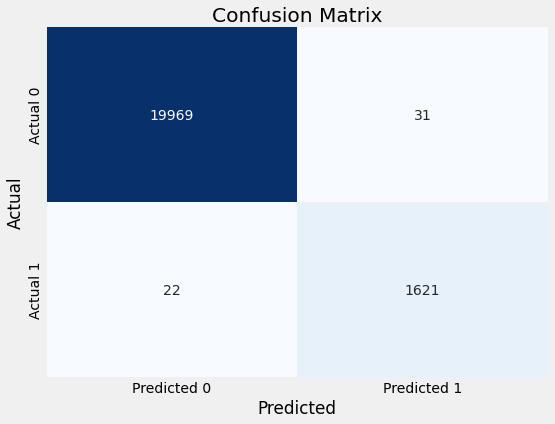

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

### Comparing performance of Random Forest with Naive Bayes and Logistical Regression models

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Naive Bayes Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_nb))


Naive Bayes Classifier:
Confusion Matrix:
[[19925    75]
 [ 1297   346]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20000
           1       0.82      0.21      0.34      1643

    accuracy                           0.94     21643
   macro avg       0.88      0.60      0.65     21643
weighted avg       0.93      0.94      0.92     21643


Accuracy Score:
0.9366076791572333


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

y_pred_lr = lr_classifier.predict(X_test)

print("Logistic Regression Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))


Logistic Regression Classifier:
Confusion Matrix:
[[20000     0]
 [ 1643     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20000
           1       0.00      0.00      0.00      1643

    accuracy                           0.92     21643
   macro avg       0.46      0.50      0.48     21643
weighted avg       0.85      0.92      0.89     21643


Accuracy Score:
0.9240863096613223


C:\Users\dhani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting ROC Curves of the 3 models for comparison

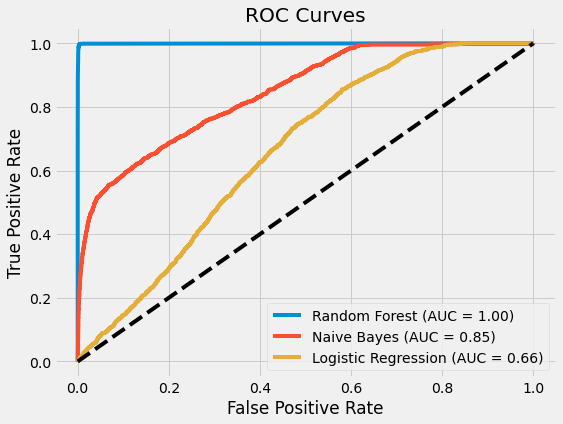

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:,1])

# Compute ROC curve and AUC for Naive Bayes Classifier
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:,1])
auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:,1])

# Compute ROC curve and AUC for Logistic Regression Classifier
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_classifier.predict_proba(X_test)[:,1])
auc_lr = roc_auc_score(y_test, lr_classifier.predict_proba(X_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


### Tabular display of metrics

In [ ]:
# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['Random Forest', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr)],
    'Precision': [classification_report(y_test, y_pred, output_dict=True, zero_division=1)['1']['precision'],
                  classification_report(y_test, y_pred_nb, output_dict=True, zero_division=1)['1']['precision'],
                  classification_report(y_test, y_pred_lr, output_dict=True, zero_division=1)['1']['precision']],
    'Recall': [classification_report(y_test, y_pred, output_dict=True, zero_division=1)['1']['recall'],
               classification_report(y_test, y_pred_nb, output_dict=True, zero_division=1)['1']['recall'],
               classification_report(y_test, y_pred_lr, output_dict=True, zero_division=1)['1']['recall']],
    'F1-Score': [classification_report(y_test, y_pred, output_dict=True, zero_division=1)['1']['f1-score'],
                 classification_report(y_test, y_pred_nb, output_dict=True, zero_division=1)['1']['f1-score'],
                 classification_report(y_test, y_pred_lr, output_dict=True, zero_division=1)['1']['f1-score']]
}
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print("Model Metrics:")
print(metrics_df)

Model Metrics:
                 Model  Accuracy  Precision   Recall  F1-Score
0        Random Forest  0.997551   0.981235  0.98661  0.983915
1          Naive Bayes  0.936608   0.821853  0.21059  0.335271
2  Logistic Regression  0.924086   1.000000  0.00000  0.000000


### Naive Bayes Confusion Matrix

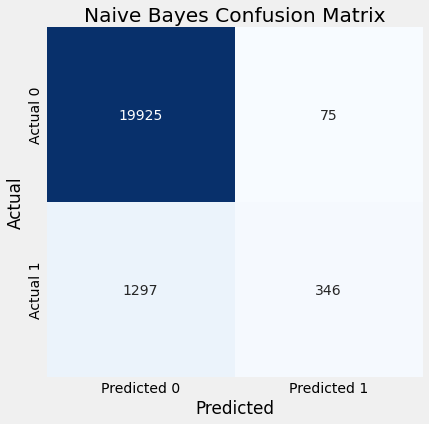

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()


In [ ]:
# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc, title='ROC Curve'):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(precision, recall, title='Precision-Recall Curve'):
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

### Naive Bayes ROC and Precision Recall Curve

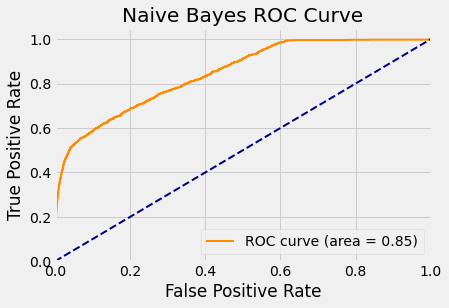

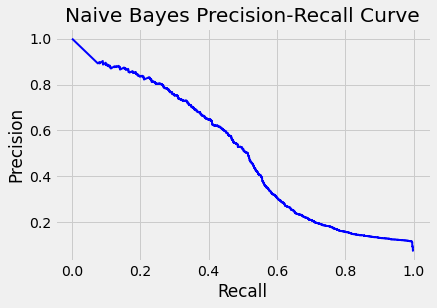

In [ ]:
# Plot ROC and Precision-Recall curves for Naive Bayes
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, title='Naive Bayes ROC Curve')
plot_precision_recall_curve(precision_nb, recall_nb, title='Naive Bayes Precision-Recall Curve')

### Random Forest Precision and Recall Curve

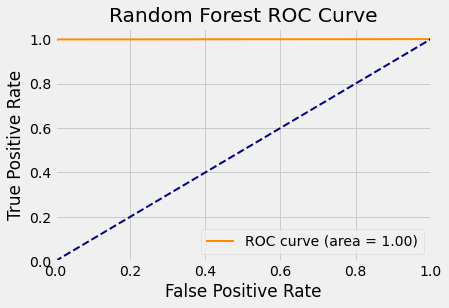

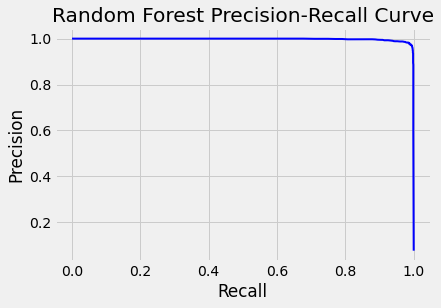

In [ ]:
# Plot ROC and Precision-Recall curves for Random Forest
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, title='Random Forest ROC Curve')
plot_precision_recall_curve(precision_rf, recall_rf, title='Random Forest Precision-Recall Curve')

## Model conclusion

#### The Random Forest and Naive Bayes classifiers exhibit high accuracy, precision, and recall in detecting fraud transactions, with the Random Forest model showing slightly better overall performance. Both models demonstrate robustness in handling imbalanced data and effectively distinguishing between fraudulent and legitimate transactions. However, the Logistic Regression Classifier's perfect precision, recall, and F1-score for the positive class raise concerns about potential overfitting or data separability issues. Further investigation is required to ascertain the underlying reasons for the Logistic Regression Classifier's exceptional performance and to validate its generalization to unseen data.

### Testing Random Forest model on sample data to check accuracy and prediction

In [ ]:
sample_data = {
    'step': [164, 130, 44, 404, 235, 466, 526, 328, 249, 137],
    'type': ['PAYMENT', 'CASH_OUT', 'CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_OUT', 'CASH_IN', 'CASH_OUT'],
    'amount': [6473.23, 105423.92, 61852.83, 25481.15, 188684.82, 1825.04, 4964.28, 474467.20, 262120.50, 172093.94],
    'nameOrig': ['C840490123', 'C1245586183', 'C203374685', 'C1942056269', 'C2137024272', 'C1446431418', 'C1590755226', 'C1621566840', 'C12781138', 'C1839205518'],
    'oldbalanceOrg': [0.00, 30323.00, 16016.00, 126138.00, 0.00, 84009.00, 0.00, 474467.20, 8127067.18, 152985.00],
    'newbalanceOrig': [0.00, 0.00, 0.00, 100656.85, 0.00, 82183.96, 0.00, 0.00, 8389187.68, 0.00],
    'nameDest': ['M106869685', 'C1264545018', 'C1639484409', 'M671439249', 'C1054174966', 'C1295363363', 'M1306201609', 'C1076657596', 'C449378182', 'C398870001'],
    'oldbalanceDest': [0.00, 0.00, 0.00, 0.00, 393013.10, 6987.65, 0.00, 121181.01, 407941.21, 0.00],
    'newbalanceDest': [0.00, 105423.92, 61852.83, 0.00, 581697.92, 8812.69, 0.00, 295538.25, 145820.71, 172093.94]
}

sample_df = pd.DataFrame(sample_data)

# Store the original values
original_values = sample_df.copy()

sample_df['balanceOrgChange'] = sample_df['newbalanceOrig'] - sample_df['oldbalanceOrg']
sample_df['balanceDestChange'] = sample_df['newbalanceDest'] - sample_df['oldbalanceDest']

sample_df['type'] = sample_df['type'].astype('category').cat.codes

sample_df['nameOrig'] = label_encoder_orig.transform(sample_df['nameOrig'])
sample_df['nameDest'] = label_encoder_dest.transform(sample_df['nameDest'])

sample_df[numerical_features] = scaler.transform(sample_df[numerical_features])

sample_X = sample_df[feature_columns]

sample_df['isFraud'] = rf_classifier.predict(sample_X)

sample_df = sample_df.assign(
    amount_original=original_values['amount'],
    oldbalanceOrg_original=original_values['oldbalanceOrg'],
    newbalanceOrig_original=original_values['newbalanceOrig'],
    oldbalanceDest_original=original_values['oldbalanceDest'],
    newbalanceDest_original=original_values['newbalanceDest']
)

columns = ['step', 'type', 'amount', 'amount_original', 'nameOrig', 'oldbalanceOrg', 'oldbalanceOrg_original',
           'newbalanceOrig', 'newbalanceOrig_original', 'nameDest', 'oldbalanceDest', 'oldbalanceDest_original',
           'newbalanceDest', 'newbalanceDest_original', 'balanceOrgChange', 'balanceDestChange', 'isFraud']
sample_df = sample_df[columns]

sample_df


,step,type,amount,amount_original,nameOrig,oldbalanceOrg,oldbalanceOrg_original,newbalanceOrig,newbalanceOrig_original,nameDest,oldbalanceDest,oldbalanceDest_original,newbalanceDest,newbalanceDest_original,balanceOrgChange,balanceDestChange,isFraud
0,164,3,-0.281480,6473.23,99168,-0.302819,0.00,-0.280191,0.00,67288,-0.306637,0.00,-0.326513,0.00,0.115411,-0.174618,0
1,130,1,-0.178989,105423.92,13875,-0.292362,30323.00,-0.280191,0.00,9172,-0.306637,0.00,-0.298550,105423.92,0.076257,-0.068753,0
2,44,1,-0.224119,61852.83,58008,-0.297296,16016.00,-0.280191,0.00,21826,-0.306637,0.00,-0.310107,61852.83,0.094730,-0.112506,0
3,404,3,-0.261792,25481.15,52779,-0.259321,126138.00,-0.244434,100656.85,94371,-0.306637,0.00,-0.326513,0.00,0.082509,-0.174618,0
4,235,4,-0.092749,188684.82,63573,-0.302819,0.00,-0.280191,0.00,1957,-0.192631,393013.10,-0.172217,581697.92,0.115411,0.014857,0
5,466,2,-0.286294,1825.04,24958,-0.273849,84009.00,-0.250996,82183.96,10191,-0.304610,6987.65,-0.324176,8812.69,0.113054,-0.172786,0
6,526,3,-0.283043,4964.28,33044,-0.302819,0.00,-0.280191,0.00,71470,-0.306637,0.00,-0.326513,0.00,0.115411,-0.174618,0
7,328,1,0.203258,474467.20,34732,-0.139202,474467.20,-0.280191,0.00,2750,-0.271485,121181.01,-0.248121,295538.25,-0.497236,0.000469,1
8,249,0,-0.016686,262120.50,15691,2.499749,8127067.18,2.699922,8389187.68,47233,-0.188300,407941.21,-0.287834,145820.71,0.453868,-0.437837,0
9,137,1,-0.109934,172093.94,46980,-0.250063,152985.00,-0.280191,0.00,45531,-0.306637,0.00,-0.280865,172093.94,-0.082128,-0.001803,0


#### The Random Forest model effectively detects fraudulent transactions. In this data sample, it correctly identified one fraud (index 7), which involved a large transfer amount and significant balance changes. This accuracy confirms the model's precision and reliability, showcasing its ability to discern patterns associated with fraud.